#### Sonny Kurniawan
Data Scientist - Universitas Lampung

No. Registrasi : 0161382101-18

###### Challenge 1

# Nutrition Fact for McDonald’s Menu
Dataset ini terdiri dari kumpulan data analisis nutrisi untuk setiap item menu di menu McDonald's AS, termasuk sarapan, burger daging sapi, sandwich ayam dan ikan, kentang goreng, salad, soda, kopi dan teh, milkshake, dan makanan penutup.


In [1]:
#Memasukan Library yang dibutuhkan
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

In [2]:
#Membaca dataset 'menu.csv'
dataset=pd.read_csv('D:/Dataset/menu.csv')

In [3]:
#Menampilkan 5 data teratas
dataset.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
#MEngecek Kolom Dataset untuk melihat data types dan jumlah data not null
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [5]:
#Menghitung jumlah data yang NULL
dataset.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

### A. How many calories does the average McDonald's value meal contain? 
Menganalisa rata - rata kalori pada makanan yang ada pada menu McDonald's. Analisa yang akan dilakukan yaitu mulai mencarinilai rata makanan berdasarkan katagorinya, kemudian membuatkan plot. selanjutnya mencari rata rata kandungan kalori pada keseluruhan makanan pada menu dengan atau tanpa minuman.

a). Tahap ini membuat level kalori yang akan dijadikan data boolean dengan menghitung nilai threshold dari jumlah kalori pada data dibagi dengan banyaknya data. Untuk mendapatkan nilai 'high' jika nilai dari kalorinya lebih besar nilai threshold dan sebaliknya untuk nilai 'low'

In [6]:
#Menghitung threshold dari jumlah total nilai kalori dibagi banyaknya data pada kolom 'Calories'
threshold=sum(dataset['Calories'])/len(dataset['Calories'])
print('threshold is', threshold)
#Menentukan nilai threshold apakah high atau low berdasarkan kondisi yang ditentukan, lalu dimasukan dalam kolom 'cal_level'
dataset['cal_level']=["high" if i>threshold else "low" for i in dataset['Calories']]
#Membuat variabel baru untuk mengambil data berisi kolom 'cal_level','Calories','Item'
df_threshold = dataset[['cal_level','Calories','Item']] 
df_threshold.head()

threshold is 368.2692307692308


,cal_level,Calories,Item
0,low,300,Egg McMuffin
1,low,250,Egg White Delight
2,high,370,Sausage McMuffin
3,high,450,Sausage McMuffin with Egg
4,high,400,Sausage McMuffin with Egg Whites


b). Slicing Data
Data akan di ambil berdasarkan data yang diperlukan saja. untuk data yang diambil yaitu data dari kolom "Category" dan baris 'Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads','Snacks & Sides', 'Desserts'.

In [7]:
#Slicing menggunakan fungsi .loc untuk mengambil hanya menu makanan berdasarkan index pada dataset.
meal = dataset.loc[(dataset["Category"].isin(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts']))]

3. Menghitung Rata Rata Kalori berdasarkan catagori menu McD

In [8]:
#Mencari rata rata nilai kalori mengunakan fungsi mean(), kemudian Groupby berdasarkan kolom "Category"
cal_category = meal.groupby(meal["Category"])['Calories'].mean()
cal_category

Category
Beef & Pork       494.000000
Breakfast         526.666667
Chicken & Fish    552.962963
Desserts          222.142857
Salads            270.000000
Snacks & Sides    245.769231
Name: Calories, dtype: float64

Telah Didapatkan nilai rata rata kalori menu Mcd Berdasarkan katagori menu. Kadar Kalori yang terbesar teletak pada katagory menu Chicken & Fish dengan nilai 552.962963 dan untuk kadar kalori terendah yaitu pada kategori menu Desserts dengan nilai 222.142857. Dari analisa ini dapat melihat mana kadar kalori dari yang terendah hingga terbesar berdasarakan kategori menu yang ada. 

c). BarChart rata rata kadar kalori

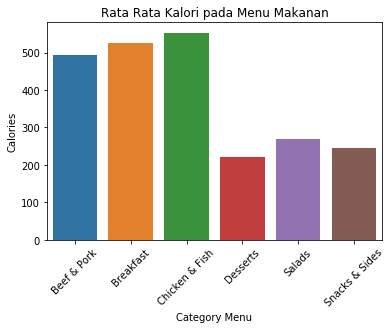

In [9]:
#Mebuat barplot rata rata kalori kategori menu dengan library sns
sns.barplot(x=dataset.groupby(meal["Category"])['Calories'].mean().index,
            y=dataset.groupby(meal["Category"])['Calories'].mean().values)    
#Membuat nama judul plot yang telah dibuat
plt.title("Rata Rata Kalori pada Menu Makanan")
#Kostumisasi label pada plot
plt.ylabel("Calories")
plt.xlabel("Category Menu")
plt.xticks(rotation=45)
plt.show()

4. Menghitung total rata rata semua menu McD

In [10]:
#Kalori rata-rata dari semua makanan McD (termasuk minuman)
print("Kalori rata-rata dari semua makanan McD (termasuk minuman) adalah ", round(dataset['Calories'].mean(axis=0), 2), "Cal.")
#Kalori rata-rata dari semua makanan McD (tanpa minuman)
print("Kalori rata-rata dari semua makanan McD (tanpa minuman) adalah ", round(meal.Calories.mean(axis=0), 2), "Cal.") 

Kalori rata-rata dari semua makanan McD (termasuk minuman) adalah  368.27 Cal.
Kalori rata-rata dari semua makanan McD (tanpa minuman) adalah  462.09 Cal.


Dari Analisa tersebut dapat dilihat nilai rata rata kandungan kalori pada menu untuk makanan termasuk minuman atau tanpa minuman. Hasil yang didapat dengan makanan termasuk minuman kandungan kalorinya lebih kecil dari pada tanpa minuman. 

### B. How much do beverages, like soda or coffee, contribute to the overall caloric intake?
Menganalisa seberapa besar kontribusi kandungan kalori berdasarkan menu minuman yang ada. Berdasarkan dataset yang ada, menu minuman dapat dilihat berdasarkan kategori yaitu 'Beverages', 'Coffee & Tea', and 'Smoothies and Shakes. Data kategoti tersebut nantinya dianalisa untuk kandungan kalori di semua item menu minuman.

a). Analisa kandungan minuman berdasarkan kategori

Sebagai sampel, saya mengambil item minuman pada kategori "Beverages". Banyak minuman, seperti soda atau kopi,yang berkontribusi pada asupan kalori keseluruhan.Secara umum, kebutuhan kalori per hari rata-rata pria dewasa adalah 2.500 kalori, sedangkan perempuan dewasa adalah sekitar 2.000 kalori. nilai tersebut akan menjadi parameter untuk menilai jumlah kalori berdasarkan item minuman.

In [11]:
# Category: Beverages
#Memngambil data dengan memfilter kategorinya 'Beverages'
beverages = dataset.loc[dataset.Category == 'Beverages']

In [12]:
# Mendapatkan kontribusi asupan kalori dari kategori Beverages
kalori_beverages = pd.DataFrame({'Item': beverages.Item, 'Calories': beverages.Calories})
#Menghitung asupan kalori per item minuman bagi Pria dewasa
kalori_beverages['Pria'] = kalori_beverages.Calories/2500
#Menghitung asupan kalori per item minuman bagi Wanita dewasa
kalori_beverages['Wanita'] = kalori_beverages.Calories/2000
kalori_beverages

,Item,Calories,Pria,Wanita
110,Coca-Cola Classic (Small),140,0.056,0.070
111,Coca-Cola Classic (Medium),200,0.080,0.100
112,Coca-Cola Classic (Large),280,0.112,0.140
113,Coca-Cola Classic (Child),100,0.040,0.050
114,Diet Coke (Small),0,0.000,0.000
115,Diet Coke (Medium),0,0.000,0.000
116,Diet Coke (Large),0,0.000,0.000
117,Diet Coke (Child),0,0.000,0.000
118,Dr Pepper (Small),140,0.056,0.070
119,Dr Pepper (Medium),190,0.076,0.095


Didapatkan hasi perhitungan asupan kalori per item minuman. Karena nilai asupan kalori yang dibutuhkan pria dan wanita berbeda maka dihitung berdasarkan kebutuhan kalori masing masing gender. Dapat dilihat nilai asupan per item minuman berbeda beda berdasarkan jumlah kalori dan asupan yang dibutuhkan. Sebagai contoh untuk item minuman Coca-Cola Classic (Large) memiliki kandungan kalori sebesar 280,dengan jumlah kalori tersebut berarti berkontribusi sebesar 0.112 kalori dari kebutuhan umum bagi pria dan sebesar 0.140 kalori bagi wanita.

b). Analisa kontribusi kalori berdasarkan rata rata kalori di semua minuman

In [13]:
#Slicing data dengan mengambil kategori 'Beverages', 'Coffee & Tea','Smoothies & Shakes' yang merupakan menu minuman
minuman = dataset.loc[(dataset["Category"].isin(['Beverages', 'Coffee & Tea',
       'Smoothies & Shakes']))]

In [14]:
#Menghitung rata rata kalori dari semua item minuman
avg_minuman = minuman['Calories'].mean(axis=0)
#Menampilkan hasil perhitungan, fungsi round() untuk menentukan jumlah digit dibelakang koma
print("Kalori rata-rata dari semua minuman adalah", round(avg_minuman, 2))
#Mengubah nilai rata2 yang telah dihitung ke numeric
avg_minuman = pd.to_numeric(avg_minuman)

#menghitung kontribusi asupan kalori bagi pria 
drink_men = (avg_minuman/2500)*100
print("Kalori rata-rata yang berkontribusi pada asupan pria ", round(drink_men, 2),"%")

#menghitung kontribusi asupan kalori bagi wanita
drink_women =(avg_minuman/2000)*100
print("Kalori rata-rata yang berkontribusi pada asupan wanita ", round(drink_women, 2),"%")


Kalori rata-rata dari semua minuman adalah 299.47
Kalori rata-rata yang berkontribusi pada asupan pria  11.98 %
Kalori rata-rata yang berkontribusi pada asupan wanita  14.97 %


Hasil yang didapat dari analisa diatas, Kalori rata-rata dari semua minuman adalah 299.47. Kalori rata-rata yang berkontribusi pada asupan pria  11.98 % dan kalori rata-rata yang berkontribusi pada asupan wanita  14.97 %.

c). Membuat Barchart Rata Rata Kalori Pada Minuman

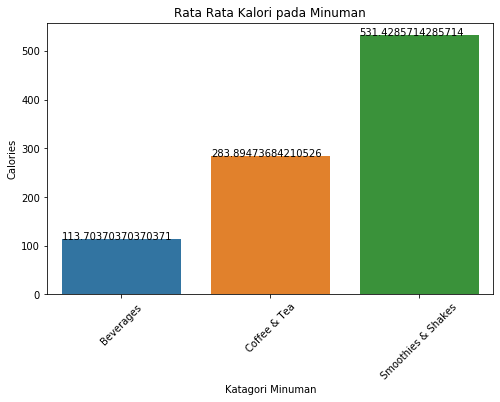

In [15]:
#Menentukan ukuran canvas
plt.figure(figsize=(8,5))
#Membuat Bar Chart dengan sumbu x berdasarkan katagori dan y nilai dari kalori
ax = sns.barplot(x=dataset.groupby(minuman["Category"])['Calories'].mean().index,
                 y=dataset.groupby(minuman["Category"])['Calories'].mean().values)
#Menampilkan nilai rata rata yang didapatkan pada ujung balok
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
#Kostumisasi label plot   
plt.title("Rata Rata Kalori pada Minuman")
plt.ylabel("Calories")
plt.xlabel("Katagori Minuman")
plt.xticks(rotation=45)
plt.show()

Terlihat bahwa untuk minuman Smoothies & Shakes memiliki kandundan rata rata kalori yang lebih bedar dibandingkan jenis minuman lainya dengan rata rata kalori sebesar 531.42. Sedangan jenis minuman Beverages memiliki kandungan rata rata kalori yang paling kecil dengan nilai 113.70 kalori. 

### C. Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value? 
Menganalisa kandungan nutrisi pada sandwich grilled chicken dengan crispy chicken. kandungan nutrisi yang akan dianalisa yaitu lemak, sodium, Karbohidrat, gula dan protein. 

a). Slicing dataset untuk memilih data apa saja yang dibutuhkan dalam analisa ini

In [16]:
#Memfilter field kolom "Item" untuk mencari item "sandwich"
sandwich = dataset[dataset['Item'].str.contains('Sandwich')]
#Mengambil kolom yang akan digunakan untuk analisa selanjutnya
sandwich = sandwich[['Category','Item','Total Fat','Sodium','Carbohydrates','Sugars', 'Protein']]
#Membuat kolom "Type" dengan isi field berdasarkan item berisi kata Crispy Chicken atau Grilled Chicken dengan fungsi .extract
sandwich['Type'] = sandwich['Item'].str.extract('(Crispy Chicken|Grilled Chicken)')
sandwich

,Category,Item,Total Fat,Sodium,Carbohydrates,Sugars,Protein,Type
57,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,22.0,990,55,10,24,Crispy Chicken
58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,9.0,820,42,8,28,Grilled Chicken
59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,33.0,1410,58,11,36,Crispy Chicken
60,Chicken & Fish,Premium Grilled Chicken Club Sandwich,20.0,1250,44,9,40,Grilled Chicken
61,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,28.0,1400,57,11,32,Crispy Chicken
62,Chicken & Fish,Premium Grilled Chicken Ranch BLT Sandwich,15.0,1230,43,9,36,Grilled Chicken
63,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,38.0,1720,65,16,36,Crispy Chicken
64,Chicken & Fish,Bacon Clubhouse Grilled Chicken Sandwich,25.0,1560,51,14,40,Grilled Chicken
65,Chicken & Fish,Southern Style Crispy Chicken Sandwich,19.0,910,43,7,21,Crispy Chicken


b). Visualisasi chart untuk kandungan lemak berdasarkan item menu

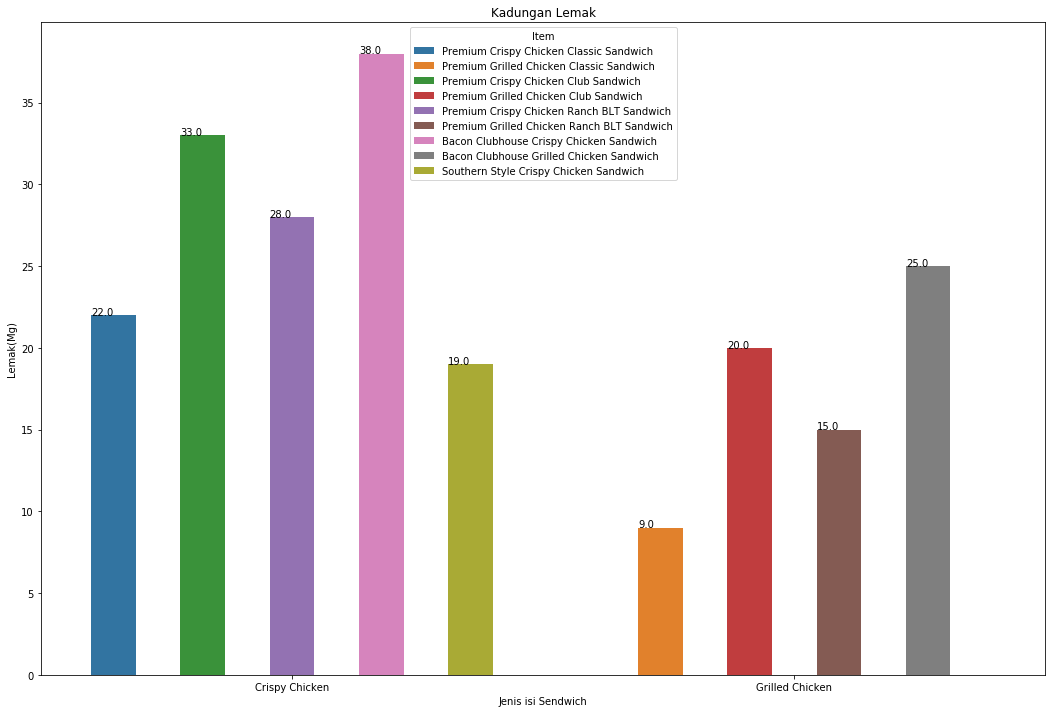

In [17]:
#Membuat kanvas dan mengatur ukurannya
plt.figure(figsize=(18,12))
#Membuat plot dengan sumbu x sebagai Jenis ayamnya dan y kandungan lemak
bar = sns.barplot(sandwich['Type'], sandwich['Total Fat'], hue=sandwich['Item'])
#kustomisasi Label
plt.title("Kadungan Lemak")
plt.ylabel("Lemak(Mg)")
plt.xlabel("Jenis isi Sendwich")
for p in bar.patches:
    bar.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

Dapat terlihat kandungan lemak pada masing masing jenis sendwich berdasarkan item menunya. Bacon Clubhouse Crispy Chicken Sandwich mengandung paling banyak lemak yaitu sebesar 38 mg. Sedangkan lemah paling rendah yaitu Premium Grilled Chicken Classic Sandwich dengan kandungan lemak 9mg. Untuk jenis sendwich crispy chicken kandungan lemak tertinggi yaitu Bacon Clubhouse Crispy Chicken Sandwich sedangkan untuk sendwich Grilled chicken kandungan lemak tertinggi yaitu Bacon Clubhouse Grilled Chicken Sandwich.

c). Visualisasi chart untuk kandungan Sodium berdasarkan item menu

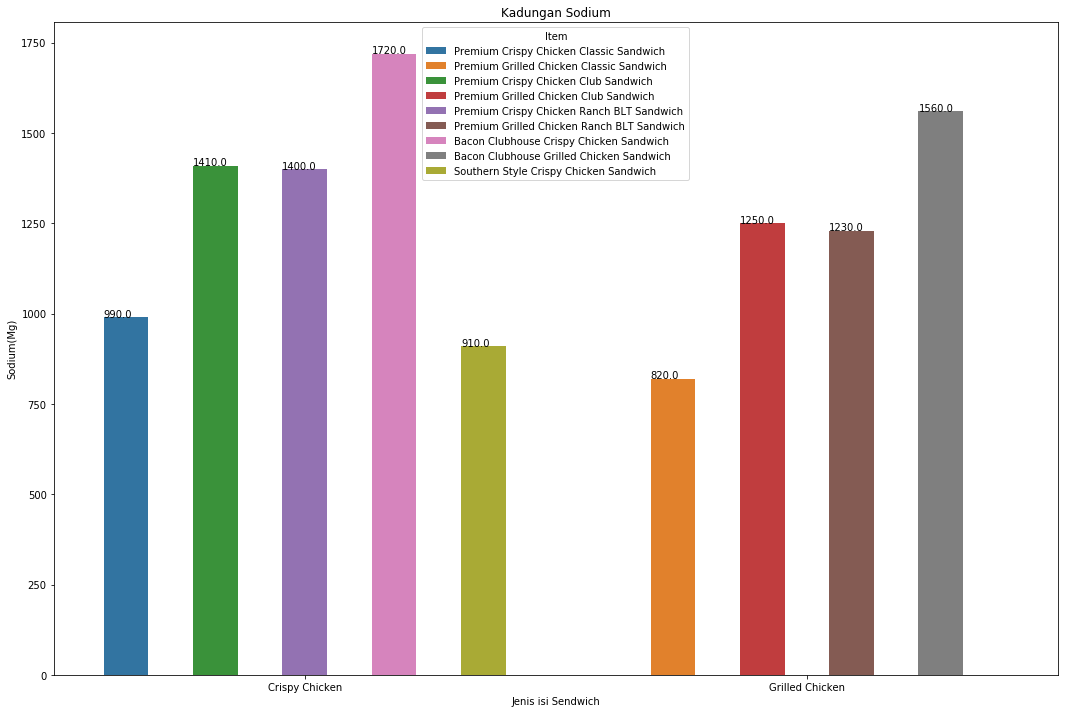

In [18]:
#Membuat kanvas dan mengatur ukurannya
plt.figure(figsize=(18,12))
#Membuat plot dengan sumbu x sebagai Jenis sendwich dan y kandungan sodium
bar = sns.barplot(sandwich['Type'], sandwich['Sodium'], hue=sandwich['Item'])
#kustomisasi Label
plt.title("Kadungan Sodium")
plt.ylabel("Sodium(Mg)")
plt.xlabel("Jenis isi Sendwich")
for p in bar.patches:
    bar.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

Dapat terlihat kandungan Sodium pada masing masing jenis sendwich berdasarkan item menunya. Bacon Clubhouse Crispy Chicken Sandwich mengandung paling banyak sodium yaitu sebesar 1720 mg. Sedangkan sodium paling rendah yaitu Premium Grilled Chicken Classic Sandwich dengan kandungan sodium 820mg.

d). Visualisasi chart untuk kandungan Karbohidrat berdasarkan item menu

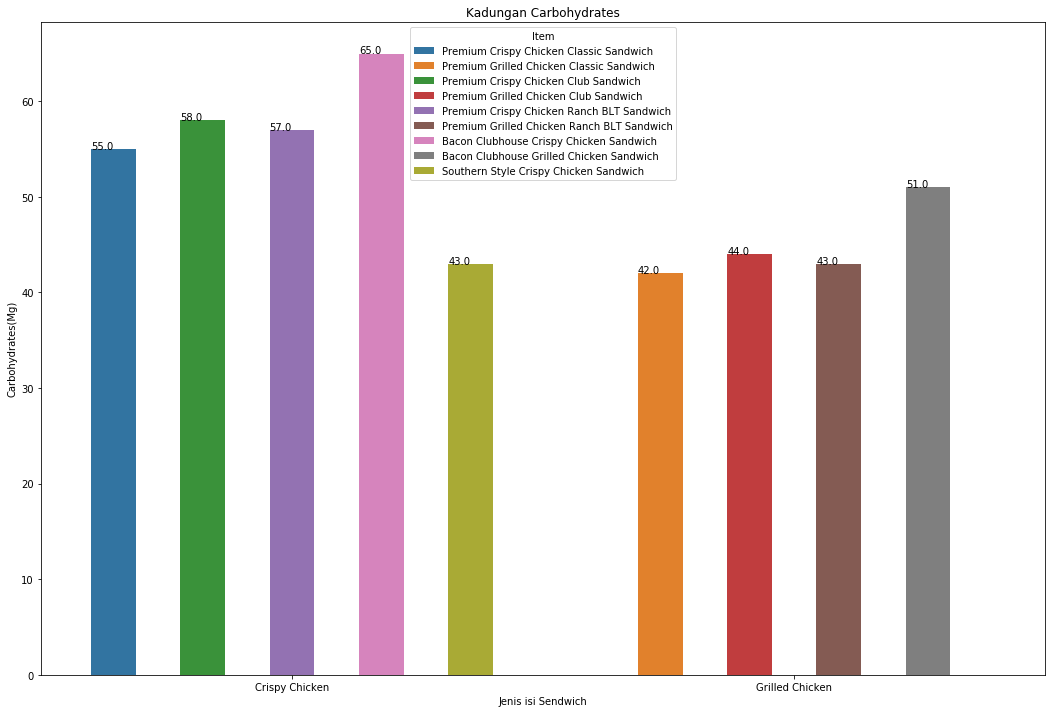

In [19]:
#Membuat kanvas dan mengatur ukurannya
plt.figure(figsize=(18,12))
#Membuat plot dengan sumbu x sebagai Jenis sendwich dan y kandungan Carbohydrates
bar = sns.barplot(sandwich['Type'], sandwich['Carbohydrates'], hue=sandwich['Item'])
#kustomisasi Label
plt.title("Kadungan Carbohydrates")
plt.ylabel("Carbohydrates(Mg)")
plt.xlabel("Jenis isi Sendwich")
for p in bar.patches:
    bar.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

Dapat terlihat kandungan karbohidrat pada masing masing jenis sendwich berdasarkan item menunya. Bacon Clubhouse Crispy Chicken Sandwich mengandung paling banyak karbohidrat yaitu sebesar 65 mg. Sedangkan karbohidrat paling rendah yaitu Premium Grilled Chicken Classic Sandwich dengan kandungan karbohidrat 42 mg. Untuk jenis sendwich crispy chicken kandungan karbohidrat tertinggi yaitu Bacon Clubhouse Crispy Chicken Sandwich sedangkan untuk sendwich Grilled chicken kandungan karbohidrat tertinggi yaitu Bacon Clubhouse Grilled Chicken Sandwich.

e). Visualisasi chart untuk kandungan Gula berdasarkan item menu

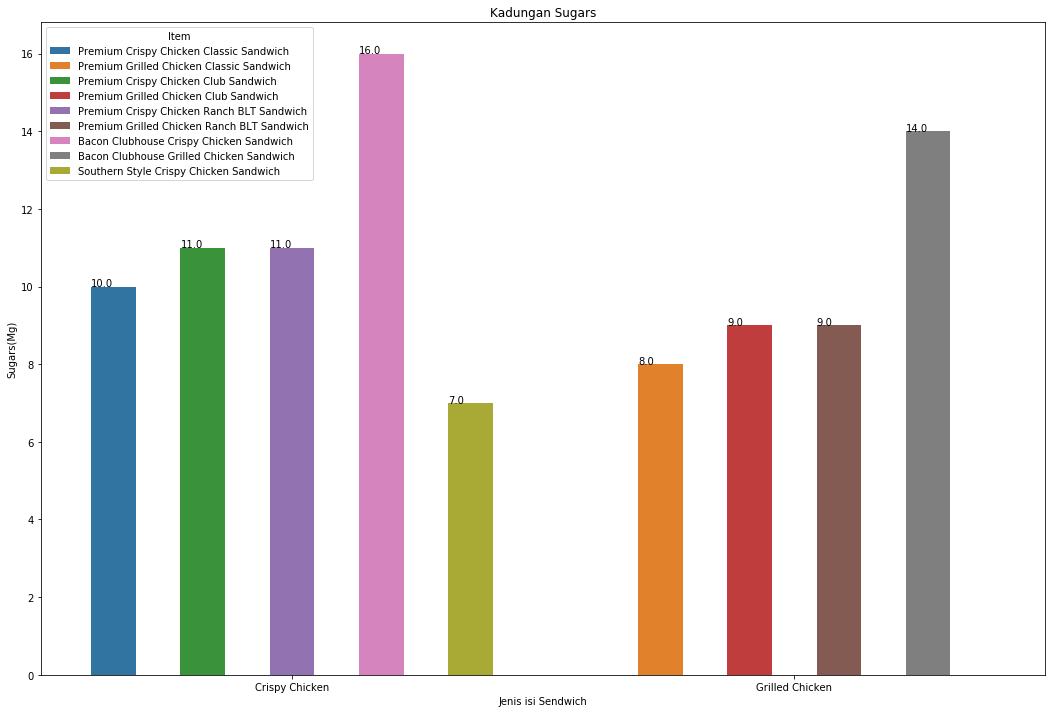

In [20]:
#Membuat kanvas dan mengatur ukurannya
plt.figure(figsize=(18,12))
#Membuat plot dengan sumbu x sebagai Jenis sendwich dan y kandungan Sugars
bar = sns.barplot(sandwich['Type'], sandwich['Sugars'], hue=sandwich['Item'])
#kustomisasi Label
plt.title("Kadungan Sugars")
plt.ylabel("Sugars(Mg)")
plt.xlabel("Jenis isi Sendwich")
for p in bar.patches:
    bar.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

Dapat terlihat kandungan gula pada masing masing jenis sendwich berdasarkan item menunya. Bacon Clubhouse Crispy Chicken Sandwich mengandung paling banyak gula yaitu sebesar 16 mg. Sedangkan gula paling rendah yaitu Southern Style Crispy Chicken Sandwich dengan kandungan gula 7 mg. Untuk jenis sendwich crispy chicken kandungan gula tertinggi yaitu Bacon Clubhouse Crispy Chicken Sandwich sedangkan untuk sendwich Grilled chicken kandungan gula tertinggi yaitu Bacon Clubhouse Grilled Chicken Sandwich.

f). Visualisasi chart untuk kandungan Gula berdasarkan item menu

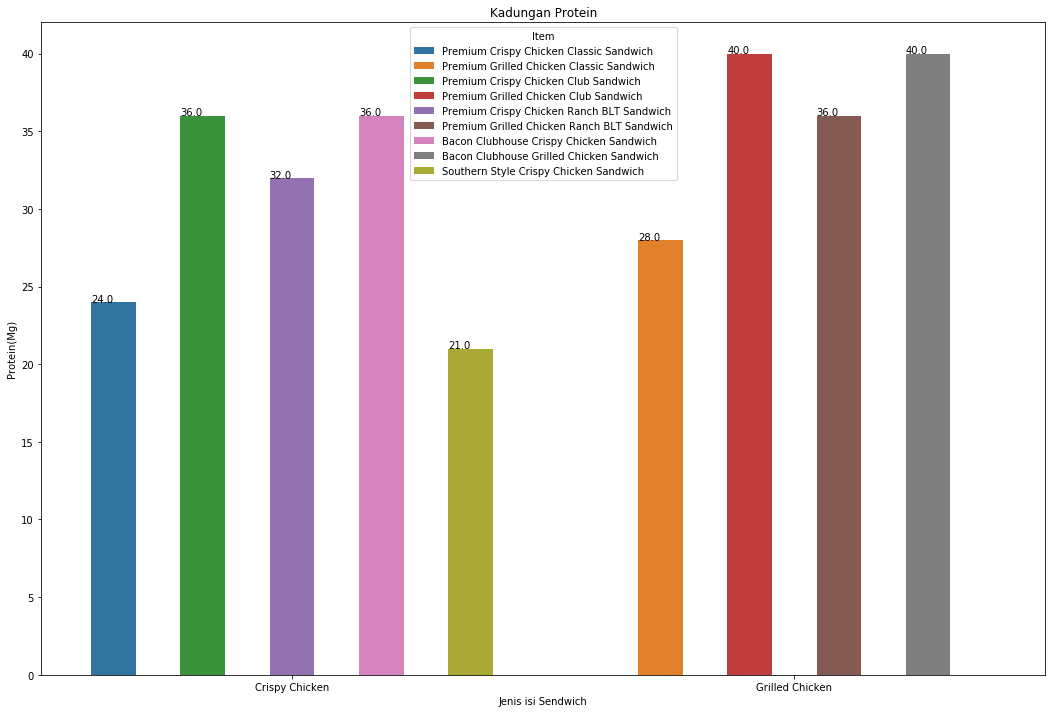

In [21]:
#Membuat kanvas dan mengatur ukurannya
plt.figure(figsize=(18,12))
#Membuat plot dengan sumbu x sebagai Jenis sendwich dan y kandungan Protein
bar = sns.barplot(sandwich['Type'], sandwich['Protein'], hue=sandwich['Item'])
#kustomisasi Label
plt.title("Kadungan Protein")
plt.ylabel("Protein(Mg)")
plt.xlabel("Jenis isi Sendwich")
for p in bar.patches:
    bar.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

Dapat terlihat kandungan protein pada masing masing jenis sendwich berdasarkan item menunya. Premium Grilled Chicken Club Sandwich dan Bacon Clubhouse Grilled Chicken Sandwich	mengandung paling banyak protein yaitu sebesar 40 mg. Sedangkan protein paling rendah yaitu Southern Style Crispy Chicken Sandwich dengan kandungan gula 7 mg. Untuk jenis sendwich crispy chicken kandungan protein tertinggi yaitu Bacon Clubhouse Crispy Chicken Sandwich dan Premium Crispy Chicken Club Sandwich sedangkan untuk sendwich Grilled chicken kandungan protein tertinggi yaitu Premium Grilled Chicken Club Sandwich dan Bacon Clubhouse Grilled Chicken Sandwich.

g). Visualisasi chart untuk komparasi rata rata kandungan nutrisi berdasarkan jenis isi sendwich

In [22]:
#Membuat variabel baru untuk data dengan jenis isi sendwich 'Crispy Chicken'
crispy = sandwich.loc[sandwich.Type == 'Crispy Chicken']
#Membuat variabel baru untuk data dengan jenis isi sendwich 'Grilled Chicken'
grilled = sandwich.loc[sandwich.Type == 'Grilled Chicken']

In [23]:
#Menghitung Rata2 kandungan sodium jenis sendwich untuk 'Grilled Chicken' dan 'Crispy Chicken'
avg_crispy_sod = crispy.Sodium.mean(axis=0)
avg_grilled_sod  = grilled.Sodium.mean(axis=0)

#Menghitung Rata2 kandungan lemak jenis sendwich untuk 'Grilled Chicken' dan 'Crispy Chicken'
avg_crispy_fat = crispy['Total Fat'].mean(axis=0)
avg_grilled_fat  = grilled['Total Fat'].mean(axis=0)

#Menghitung Rata2 kandungan karbohidrat jenis sendwich untuk 'Grilled Chicken' dan 'Crispy Chicken'
avg_crispy_car = crispy['Carbohydrates'].mean(axis=0)
avg_grilled_car  = grilled['Carbohydrates'].mean(axis=0)

#Menghitung Rata2 kandungan gula jenis sendwich untuk 'Grilled Chicken' dan 'Crispy Chicken'
avg_crispy_sug = crispy['Sugars'].mean(axis=0)
avg_grilled_sug  = grilled['Sugars'].mean(axis=0)

#Menghitung Rata2 kandungan protein jenis sendwich untuk 'Grilled Chicken' dan 'Crispy Chicken'
avg_crispy_pro = crispy['Protein'].mean(axis=0)
avg_grilled_pro  = grilled['Protein'].mean(axis=0)

In [24]:
#Membuat variabel nutrisi berdasarkan nilai rata rata yang telah dihitung
avg_sod = [avg_crispy_sod, avg_grilled_sod]
avg_fat = [avg_crispy_fat, avg_grilled_fat]
avg_car = [avg_crispy_car, avg_grilled_car]
avg_sug = [avg_crispy_sug, avg_grilled_sug]
avg_pro = [avg_crispy_pro, avg_grilled_pro]
index = ['Crispy Chicken', 'Grilled Chicken']
#Membuat Dataframe baru dengan fungsi .DataFrame yang berisi variabel yang telah dibuat
avg_nutrisi = pd.DataFrame({'Avg Sodium': avg_sod,
                          'Avg Fat': avg_fat,
                          'Avg Carbohydrates' : avg_car,
                          'Avg Sugars' : avg_sug,
                          'Avg Protein' : avg_pro
                         }, 
                         index=index)

Text(0.5, 0, 'Jenis isi Sendwich')

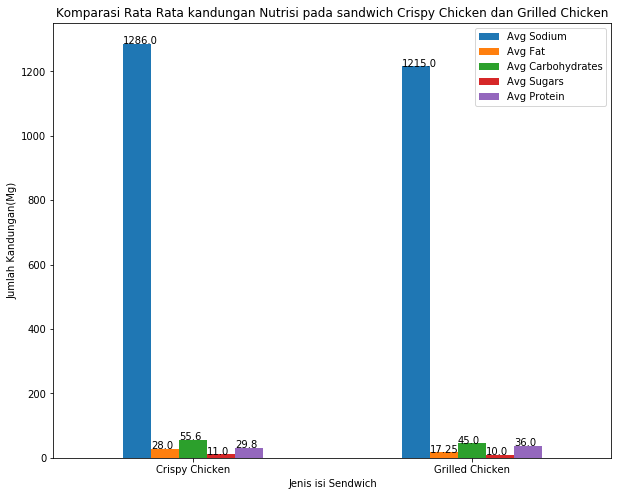

In [25]:
#membuat plot dataframe avg_nutrisi
ax = avg_nutrisi.plot.bar(rot=0, figsize=(10,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
#kustomisasi Label  
ax.set_title("Komparasi Rata Rata kandungan Nutrisi pada sandwich Crispy Chicken dan Grilled Chicken")
ax.set_ylabel("Jumlah Kandungan(Mg)")
ax.set_xlabel("Jenis isi Sendwich")

Dapat dilihat bahwa dari kedua jenis sendwich rata rata kandungan nutrisi yang paling tinggi yaitu sodium. Pada Crispy Chicken kandungan sodium sebanyak 1286 mg sedangkan pada Grilled Chicken sebanyak 1215 mg.

## D. What about ordering egg whites instead of whole eggs?
Menganalisa kandungan nutrisi pada menu item yang menggunakan egg whites dengan whole eggs

a).Menganalisa kandungan 'Total Fat','Carbohydrates','Sugars', 'Protein','Calcium (% Daily Value)'

Memilih data sesuai kebutuhan analisis. Dilakukan juga filtering data mana saja yang menggunakan egg whites maupun whole eggs pada item makanannya. Sehingga data tersebut dapat di komparasi berdasarkan nutrisinya sesuai perintah analisanya.

In [26]:
#Memfilter data dimana data mengandung kata "with Egg"
eggs = dataset[dataset['Item'].str.contains("with Egg")]
#Memfilter data dimana data mengandung kata Sausage McMuffin atau Sausage Biscuit
eggs = eggs[eggs['Item'].str.contains("Sausage McMuffin|Sausage Biscuit")]
eggs = eggs[['Item','Total Fat','Calcium (% Daily Value)','Carbohydrates','Sugars', 'Protein']]
#Mebuat kolom 'Egg Type' lalu mengisi data kategorik "Whole Egg" atau "Egg Whites"
eggs['Egg Type'] = eggs['Item'].str.extract("(Egg Whites)")
eggs['Egg Type'].fillna('Whole Egg', axis=0, inplace=True)
#Sort Value berdasarkan tipe telur
eggs = eggs.sort_values('Egg Type', ascending=False)
eggs

,Item,Total Fat,Calcium (% Daily Value),Carbohydrates,Sugars,Protein,Egg Type
3,Sausage McMuffin with Egg,28.0,30,30,2,21,Whole Egg
12,Sausage Biscuit with Egg (Regular Biscuit),33.0,10,36,2,18,Whole Egg
13,Sausage Biscuit with Egg (Large Biscuit),37.0,10,42,3,18,Whole Egg
4,Sausage McMuffin with Egg Whites,23.0,25,30,2,21,Egg Whites
14,Sausage Biscuit with Egg Whites (Regular Biscuit),27.0,8,34,3,18,Egg Whites
15,Sausage Biscuit with Egg Whites (Large Biscuit),32.0,8,40,3,18,Egg Whites


b). Memvisualisasikan kandungan 'Total Fat','Carbohydrates','Sugars', 'Protein','Calcium (% Daily Value)' per item menu menggunakan telur

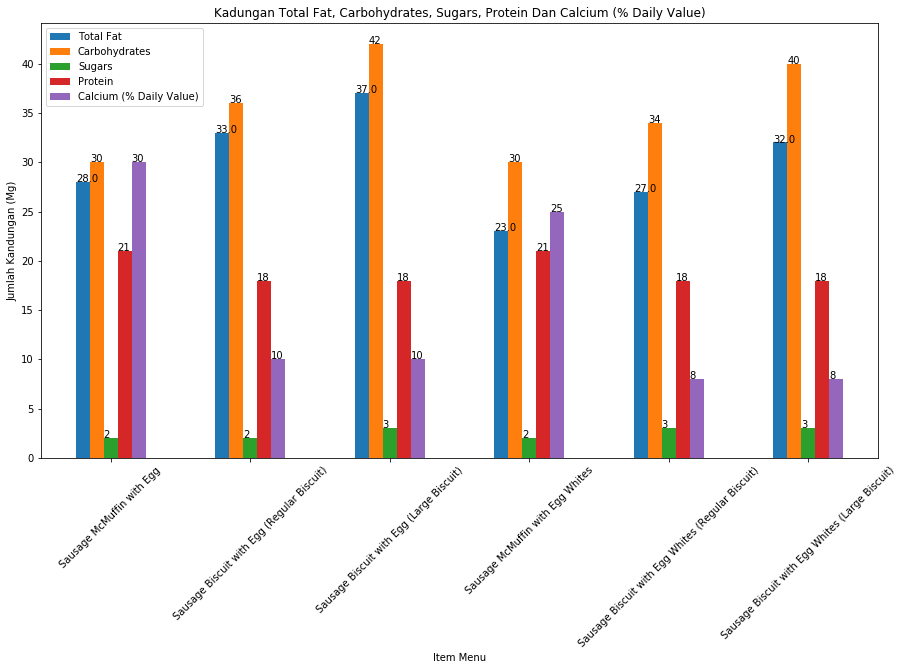

In [27]:
#Membuat plot 
ax = eggs.reset_index().plot(
    x="Item", y=['Total Fat','Carbohydrates','Sugars', 'Protein','Calcium (% Daily Value)'], 
    kind="bar", 
    figsize=(15,8),
)
plt.title("Kadungan Total Fat, Carbohydrates, Sugars, Protein Dan Calcium (% Daily Value)")
plt.ylabel("Jumlah Kandungan (Mg)")
plt.xlabel("Item Menu")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

Hasil Visualisasi memperlihatkan kandungan karbohidrat dari semua menu dengan telur menjadi yang terbanyak. Sedangkan kandungan gula menjadi yang terkecil pada semua item menu

c). Visualisasi Rata Rata Kandungan 'Total Fat','Carbohydrates','Sugars', 'Protein','Calcium (% Daily Value)' pada menu menggunakan telur

In [28]:
#Membuat variabel baru untuk data dengan menu menggunakan 'Whole Egg'
whole = eggs.loc[eggs['Egg Type'] == 'Whole Egg']
#Membuat variabel baru untuk data dengan menu menggunakan 'Egg Whites'
white = eggs.loc[eggs['Egg Type'] == 'Egg Whites']

In [29]:
#Menghitung Rata2 kandungan kalsium menu menggunakan 'Whole Egg' dan 'Egg Whites'
avg_whole_calc = round(whole['Calcium (% Daily Value)'].mean(axis=0), 2)
avg_white_calc  = round(white['Calcium (% Daily Value)'].mean(axis=0), 2)

#Menghitung Rata2 kandungan lemak menu menggunakan 'Whole Egg' dan 'Egg Whites'
avg_whole_fat = round(whole['Total Fat'].mean(axis=0),2)
avg_white_fat  = round(white['Total Fat'].mean(axis=0),2)

#Menghitung Rata2 kandungan karbohidrat menu menggunakan 'Whole Egg' dan 'Egg Whites'
avg_whole_car = round(whole['Carbohydrates'].mean(axis=0), 2)
avg_white_car  = round(white['Carbohydrates'].mean(axis=0), 2)

#Menghitung Rata2 kandungan gula menu menggunakan 'Whole Egg' dan 'Egg Whites'
avg_whole_sug = round(whole['Sugars'].mean(axis=0), 2)
avg_white_sug  = round(white['Sugars'].mean(axis=0), 2)

#Menghitung Rata2 kandungan protein menu menggunakan 'Whole Egg' dan 'Egg Whites'
avg_whole_pro = round(whole['Protein'].mean(axis=0), 2)
avg_white_pro  = round(white['Protein'].mean(axis=0), 2)

In [30]:
#Membuat variabel kandungan nutrisi berdasarkan nilai rata rata yang telah dihitung
egg_calc = [avg_whole_calc, avg_white_calc]
egg_fat = [avg_whole_fat, avg_white_fat]
egg_car = [avg_whole_car, avg_white_car]
egg_sug = [avg_whole_sug, avg_white_sug]
egg_pro = [avg_whole_pro, avg_white_pro]
index = ['Whole Egg', 'Egg Whites']
#Membuat Dataframe baru dengan fungsi .DataFrame yang berisi variabel yang telah dibuat
egg_nutrisi = pd.DataFrame({'Avg Calcium': egg_calc,
                          'Avg Fat': egg_fat,
                          'Avg Carbohydrates' : egg_car,
                          'Avg Sugars' : egg_sug,
                          'Avg Protein' : egg_pro
                         }, 
                         index=index)

Text(0.5, 0, 'Item Menu')

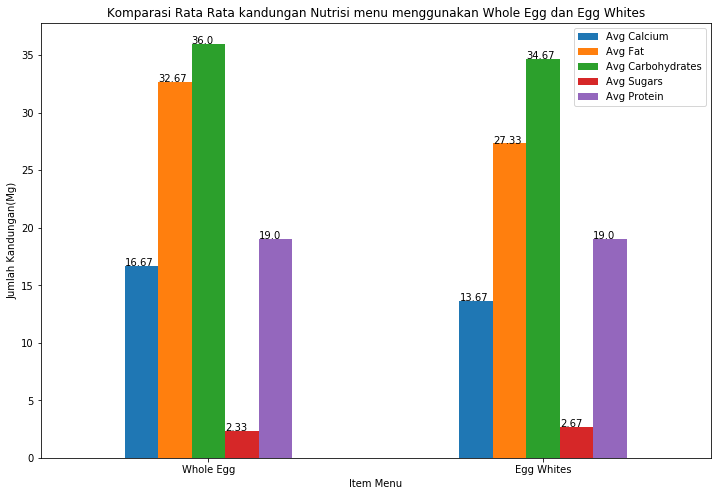

In [31]:
#membuat plot dataframe egg_nutrisi
ax = egg_nutrisi.plot.bar(rot=0, figsize=(12,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
#kustomisasi Label  
ax.set_title("Komparasi Rata Rata kandungan Nutrisi menu menggunakan Whole Egg dan Egg Whites")
ax.set_ylabel("Jumlah Kandungan(Mg)")
ax.set_xlabel("Item Menu")

Hasil visualisasi memperlihatkan bahwa kandungan karbohidrat dari whole eggs maupun egg white memiliki kandungan yang tinggi. Pada whole eggs kandungan karbohidrat yaitu 36 mg sedangkan pada egg whites 34.67 mg. Untuk kandungan gula menjadi yang terendah untuk kedua jenis menu menggunakan telur.

d).  Memvisualisasikan kandungan Vitamin A Dengan Zat Besi pada menu menggunakan Telur

In [32]:
#Memfilter data dimana data mengandung kata "with Egg"
eggs1 = dataset[dataset['Item'].str.contains("with Egg")]
#Memfilter data dimana data mengandung kata Sausage McMuffin atau Sausage Biscuit
eggs1 = eggs1[eggs1['Item'].str.contains("Sausage McMuffin|Sausage Biscuit")]
eggs1 = eggs1[['Item', 'Vitamin A (% Daily Value)', 'Iron (% Daily Value)']]
#Mebuat kolom 'Egg Type' lalu mengisi data kategorik "Whole Egg" atau "Egg Whites"
eggs1['Egg Type'] = eggs1['Item'].str.extract("(Egg Whites)")
eggs1['Egg Type'].fillna('Whole Egg', axis=0, inplace=True)
#Sort Value berdasarkan tipe telur
eggs1 = eggs1.sort_values('Egg Type', ascending=False)
eggs1

,Item,Vitamin A (% Daily Value),Iron (% Daily Value),Egg Type
3,Sausage McMuffin with Egg,15,15,Whole Egg
12,Sausage Biscuit with Egg (Regular Biscuit),6,20,Whole Egg
13,Sausage Biscuit with Egg (Large Biscuit),10,20,Whole Egg
4,Sausage McMuffin with Egg Whites,6,10,Egg Whites
14,Sausage Biscuit with Egg Whites (Regular Biscuit),0,15,Egg Whites
15,Sausage Biscuit with Egg Whites (Large Biscuit),4,15,Egg Whites


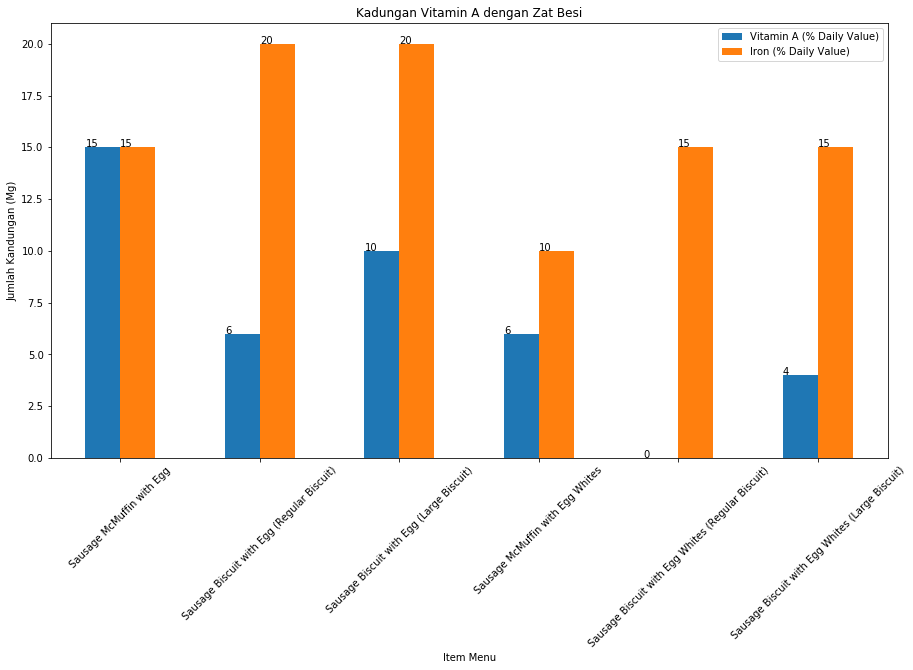

In [33]:
#Membuat plot 
ax = eggs1.reset_index().plot(
    x="Item", y=['Vitamin A (% Daily Value)', 'Iron (% Daily Value)'], 
    kind="bar", 
    figsize=(15,8),
)
plt.title("Kadungan Vitamin A dengan Zat Besi")
plt.ylabel("Jumlah Kandungan (Mg)")
plt.xlabel("Item Menu")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

Terlihat bahwa kandungan zat besi lebih dominan lebih tinggi dibandingkan kandungan vit A pasa setiap item menu. Kandungan Zat Besi yang tertinggi yaitu sebanyak 20mg pada menu Sausage Biscuit with Egg (Large Biscuit) dan Sausage Biscuit with Egg (Regular Biscuit). Sedangkan Vit A tertinggi pada menu Sausage McMuffin with Egg	sebnyak 15mg.

e). Memvisualisasikan kandungan Vitamin A dengan Zat Besi per item menu menggunakan telur

In [34]:
#Membuat variabel baru untuk data dengan menu menggunakan 'Whole Egg'
whole1 = eggs1.loc[eggs1['Egg Type'] == 'Whole Egg']
#Membuat variabel baru untuk data dengan menu menggunakan 'Egg Whites'
white1 = eggs1.loc[eggs1['Egg Type'] == 'Egg Whites']

In [35]:
#Menghitung Rata2 kandungan Vitamin A menu menggunakan 'Whole Egg' dan 'Egg Whites'
avg_whole_vita = round(whole1['Vitamin A (% Daily Value)'].mean(axis=0), 2)
avg_white_vita  = round(white1['Vitamin A (% Daily Value)'].mean(axis=0), 2)

#Menghitung Rata2 kandungan Zat Besi menu menggunakan 'Whole Egg' dan 'Egg Whites'
avg_whole_ir = round(whole1['Iron (% Daily Value)'].mean(axis=0),2)
avg_white_ir  = round(white1['Iron (% Daily Value)'].mean(axis=0),2)

In [36]:
#Membuat variabel kandungan nutrisi berdasarkan nilai rata rata yang telah dihitung
egg_vita = [avg_whole_vita, avg_white_vita]
egg_ir = [avg_whole_ir, avg_white_ir]

index = ['Whole Egg', 'Egg Whites']
#Membuat Dataframe baru dengan fungsi .DataFrame yang berisi variabel yang telah dibuat
egg_nutrisi1 = pd.DataFrame({'Avg Vitamin A': egg_vita,
                          'Avg Iron': egg_ir,
                         }, 
                         index=index)

Text(0.5, 0, 'Item Menu')

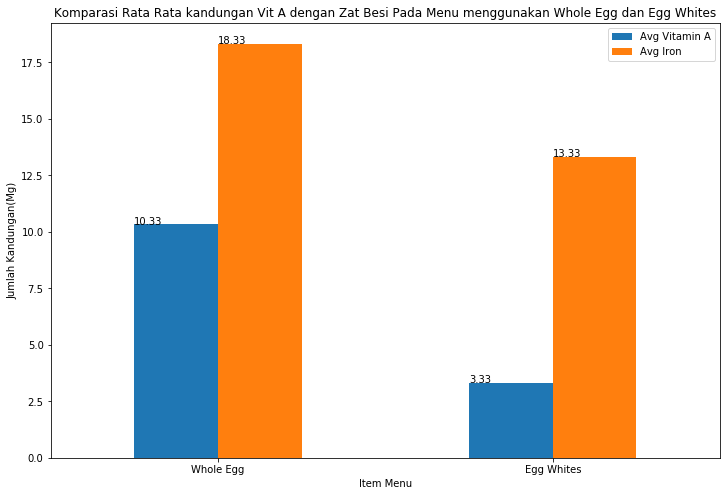

In [37]:
#membuat plot dataframe egg_nutrisi
ax = egg_nutrisi1.plot.bar(rot=0, figsize=(12,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
#kustomisasi Label  
ax.set_title("Komparasi Rata Rata kandungan Vit A dengan Zat Besi Pada Menu menggunakan Whole Egg dan Egg Whites")
ax.set_ylabel("Jumlah Kandungan(Mg)")
ax.set_xlabel("Item Menu")

Untuk kedua jenis telur memiliki kandungan zat besi yang tinggi dibandingkan dengan vitamin A.  Pada Whole egg memiliki rata rata kandugan zat besi yagn tinggi, yaitu sebesar 18.33 mg. Untuk kandungan Vitamin A yang tertinggi juga pada Whole egg sebanyak 10.33 mg.

## E. What is the least number of items could you order from the menu to meet one day's  nutritional requirements?
Diasumsikan bahwa kolom yang terdapat "% Daily Value" merupakan kebutuhan nutrisi per hari yang dibutuhkan. 


In [38]:
daily_data = dataset[['Item', 'Total Fat (% Daily Value)','Cholesterol (% Daily Value)', 'Sodium (% Daily Value)', 'Carbohydrates (% Daily Value)','Vitamin A (% Daily Value)','Iron (% Daily Value)']]
daily_data

,Item,Total Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Vitamin A (% Daily Value),Iron (% Daily Value)
0,Egg McMuffin,20,87,31,10,10,15
1,Egg White Delight,12,8,32,10,6,8
2,Sausage McMuffin,35,15,33,10,8,10
3,Sausage McMuffin with Egg,43,95,36,10,15,15
4,Sausage McMuffin with Egg Whites,35,16,37,10,6,10
...,...,...,...,...,...,...,...
255,McFlurry with Oreo Cookies (Small),26,14,12,27,15,8
256,McFlurry with Oreo Cookies (Medium),35,19,16,35,20,10
257,McFlurry with Oreo Cookies (Snack),17,9,8,18,10,6
258,McFlurry with Reese's Peanut Butter Cups (Medium),50,20,17,38,20,6


In [39]:
daily_data.describe()

,Total Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Vitamin A (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,21.815385,18.392308,20.676923,15.780769,13.426923,7.734615
std,21.885199,29.091653,24.034954,9.419544,24.366381,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,2.000000,4.750000,10.000000,2.000000,0.000000
50%,17.000000,11.000000,8.000000,15.000000,8.000000,4.000000
75%,35.000000,21.250000,36.250000,20.000000,15.000000,15.000000
max,182.000000,192.000000,150.000000,47.000000,170.000000,40.000000


a).Mencari nilai max Kadar nutrisi

In [40]:
#Mebuat array kosong 
max_daily=[]
#Mencari Nilai Max setiap index berdasarkan nilai max pada masing masing kolom
for i in daily_data.describe().columns:
    max_daily.extend(daily_data[daily_data[i]==daily_data.describe().loc['max',i]].index.tolist())
max_daily


[82, 31, 32, 82, 246, 249, 84, 88, 89, 31, 32]

In [41]:
#Membuat Variable index set
index_set = set(max_daily)

In [47]:
#Membuat index_set menjadi list
index_list = list(index_set)
max_daily = daily_data.iloc[index_list,:]
max_daily

,Item,Total Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Vitamin A (% Daily Value),Iron (% Daily Value)
32,Big Breakfast with Hotcakes (Large Biscuit),93,192,94,39,15,40
89,Premium Southwest Salad with Grilled Chicken,13,23,28,9,170,15
82,Chicken McNuggets (40 piece),182,89,150,39,0,25
84,Premium Bacon Ranch Salad (without Chicken),11,9,13,3,170,6
246,Strawberry Shake (Large),36,30,11,47,30,0
88,Premium Southwest Salad with Crispy Chicken,33,17,35,14,170,15
249,Chocolate Shake (Large),36,29,16,47,30,15
31,Big Breakfast with Hotcakes (Regular Biscuit),87,192,90,37,15,40


b).Mencari kebutuhan nutrisi per hari yang dibutuhkan.

Saya Mengasumsikan bahwa memiliki nilai minimal 100 untuk setiap daily value. Nilai tersebut akan mencari parameter untuk mencari menu dengan library combinations.

In [49]:
#Mencari kombinasi menggunakan library combinations
from itertools import combinations
#Mencari 3 menu item, asumsi memiliki minimal 100 untuk setiap daily value.
for i in combinations(max_daily.index,3):
    table = daily_data.iloc[list(i),:]
    l = []
    for n in max_daily.columns[1:]:
        m = table[n].sum()
        l.append(m)
    if all(l>=100*np.ones(6)):
        print(i)
        break

In [50]:
#Menampilkan menu kombinasi diatas
requirements_menu = daily_data.iloc[list(i),:]
requirements_menu

,Item,Total Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Vitamin A (% Daily Value),Iron (% Daily Value)
88,Premium Southwest Salad with Crispy Chicken,33,17,35,14,170,15
249,Chocolate Shake (Large),36,29,16,47,30,15
31,Big Breakfast with Hotcakes (Regular Biscuit),87,192,90,37,15,40


In [51]:
#Menampilkan jumlah nutrisi berdasarkan mencari kombinasi item menu
for s in daily_data.describe().columns:
    print(s,': ', requirements_menu[s].sum())

Total Fat (% Daily Value) :  156
Cholesterol (% Daily Value) :  238
Sodium (% Daily Value) :  141
Carbohydrates (% Daily Value) :  98
Vitamin A (% Daily Value) :  215
Iron (% Daily Value) :  70
